In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
dat=pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p','rb'))
dino=pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p','rb'))
dino_mid=pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p','rb'))

ridge=Ridge()

ridge.fit(dino,dat.T[0,:])

pred_ridge=ridge.predict(dino)



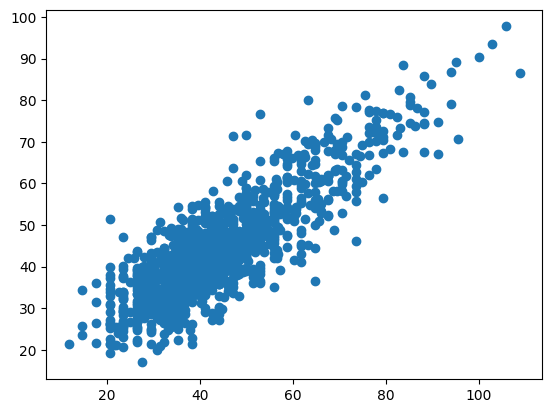

In [3]:
plt.plot(dat.T[0,:],pred_ridge,'o')

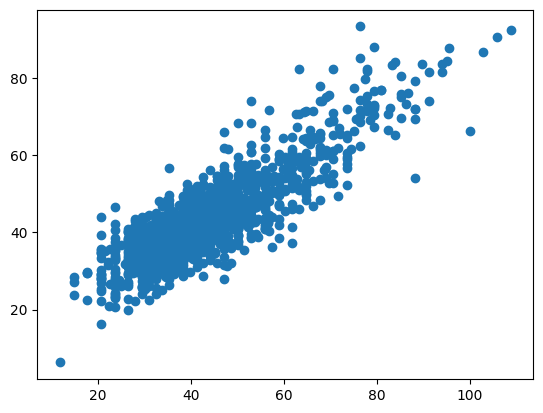

In [5]:
ridge=Ridge()

ridge.fit(dino_mid,dat.T[0,:])

pred_ridge=ridge.predict(dino_mid)

plt.plot(dat.T[0,:],pred_ridge,'o')